# SITARAM DUBAGUNTA PC-50 240911624

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df =  pd.read_csv('datasets/deliveries.csv')

In [4]:
df

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


1. Find and visualize the total runs scored by each team. 

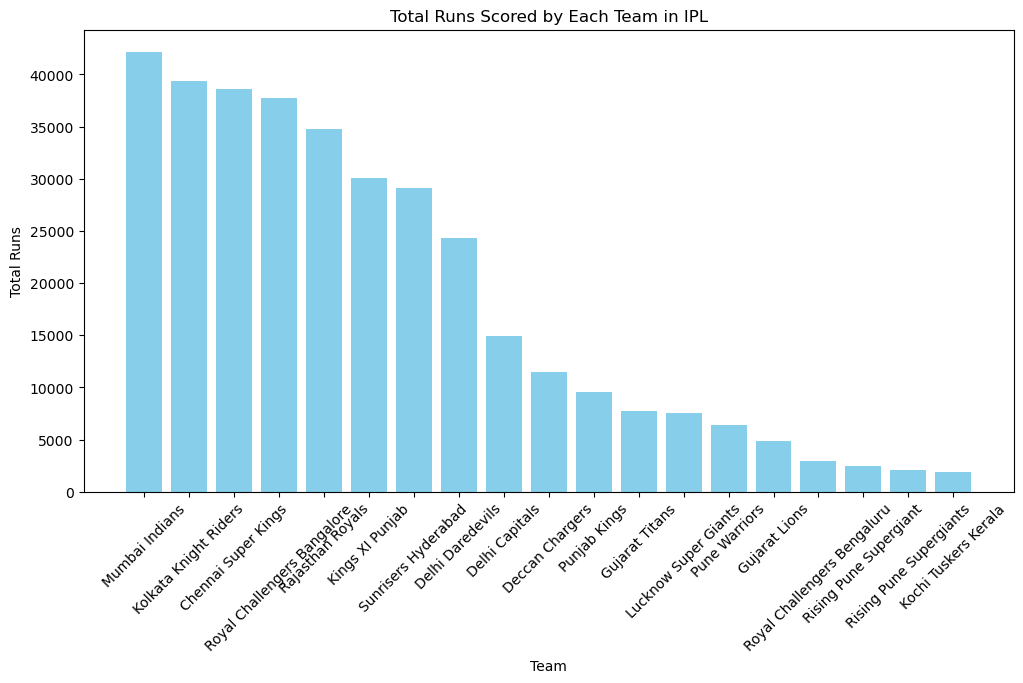

In [11]:
# Load the dataset
file_path = 'datasets/deliveries.csv'
data = pd.read_csv(file_path)

# Aggregate total runs by team
team_runs = data.groupby('batting_team')['total_runs'].sum().reset_index()

# Sort values for better visualization
team_runs = team_runs.sort_values(by='total_runs', ascending=False)

# Plot the data
plt.figure(figsize=(12, 6))
plt.bar(team_runs['batting_team'], team_runs['total_runs'], color='skyblue')
plt.xlabel('Team')
plt.ylabel('Total Runs')
plt.title('Total Runs Scored by Each Team in IPL')
plt.xticks(rotation=45)
plt.show()

2. Identify and display the names of the top 10 highest-scoring batters with their total runs 
scored.

In [18]:
top_batters = df.groupby('batter')['batsman_runs'].sum().reset_index()

# Sort the batters by total runs in descending order
top_batters = top_batters.sort_values(by='batsman_runs', ascending=False)

# Display the top 10 batters
top_10_batters = top_batters.head(10)
print(top_10_batters)

             batter  batsman_runs
631         V Kohli          8014
512        S Dhawan          6769
477       RG Sharma          6630
147       DA Warner          6567
546        SK Raina          5536
374        MS Dhoni          5243
30   AB de Villiers          5181
124        CH Gayle          4997
501      RV Uthappa          4954
282      KD Karthik          4843


3. Find and visualize the top 10 bowlers with the most wickets. 

         bowler  wickets
449   YS Chahal      213
104    DJ Bravo      207
301   PP Chawla      201
383   SP Narine      200
308    R Ashwin      198
63      B Kumar      195
376  SL Malinga      188
7      A Mishra      183
171   JJ Bumrah      182
323   RA Jadeja      169


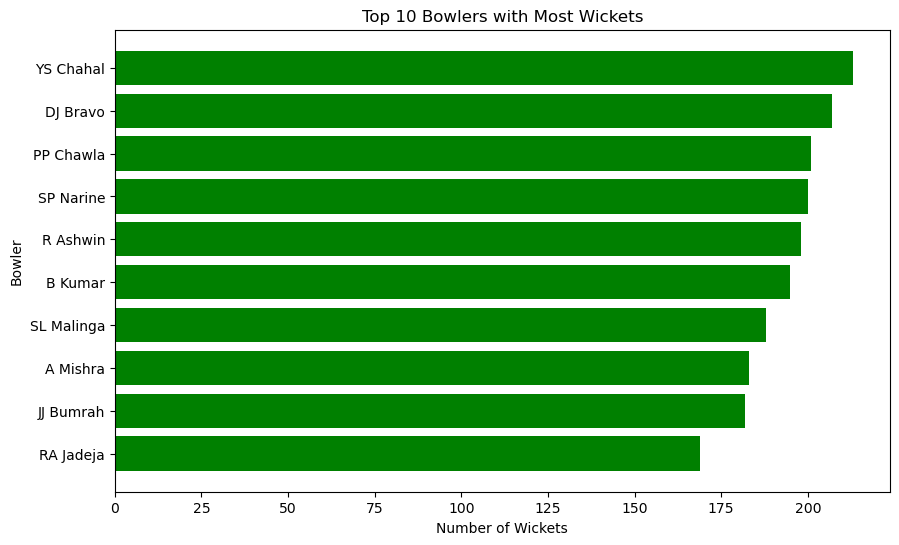

In [19]:
# Filter the rows where a wicket was taken (assuming 1 means a wicket in 'is_wicket' column)
wickets = df[df['is_wicket'] == 1]

# Group the data by bowler and count the number of wickets
top_bowlers = wickets.groupby('bowler')['is_wicket'].count().reset_index()

# Rename columns for clarity
top_bowlers.columns = ['bowler', 'wickets']

# Sort the bowlers by the number of wickets in descending order
top_bowlers = top_bowlers.sort_values(by='wickets', ascending=False)

# Display the top 10 bowlers
top_10_bowlers = top_bowlers.head(10)
print(top_10_bowlers)

# Plot the top 10 bowlers
plt.figure(figsize=(10, 6))
plt.barh(top_10_bowlers['bowler'], top_10_bowlers['wickets'], color='green')
plt.xlabel('Number of Wickets')
plt.ylabel('Bowler')
plt.title('Top 10 Bowlers with Most Wickets')
plt.gca().invert_yaxis()  # To display the highest wicket taker at the top
plt.show()

4. Tabulate and visualize the total number of extras conceded by each team. 

                   bowling_team  extra_runs
10               Mumbai Indians        2295
16  Royal Challengers Bangalore        2040
8         Kolkata Knight Riders        1957
13             Rajasthan Royals        1917
0           Chennai Super Kings        1842
6               Kings XI Punjab        1571
3              Delhi Daredevils        1268
18          Sunrisers Hyderabad        1254
2                Delhi Capitals         725
1               Deccan Chargers         659
12                 Punjab Kings         480
9          Lucknow Super Giants         386
11                Pune Warriors         335
5                Gujarat Titans         295
4                 Gujarat Lions         188
17  Royal Challengers Bengaluru         151
14       Rising Pune Supergiant         111
7          Kochi Tuskers Kerala         110
15      Rising Pune Supergiants         108


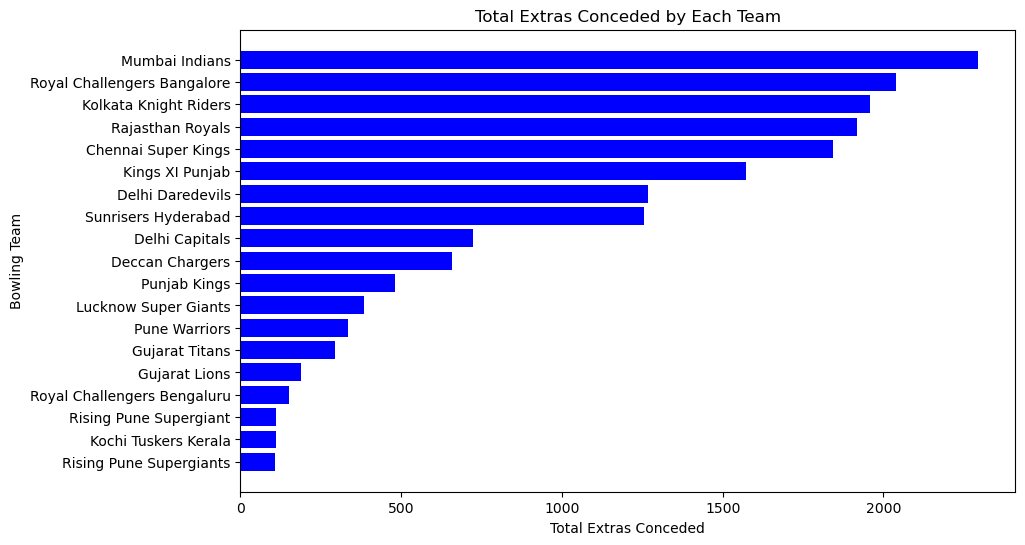

In [20]:
# Group by bowling team and sum up the extra runs conceded
extras_conceded = df.groupby('bowling_team')['extra_runs'].sum().reset_index()

# Sort the teams by total extras in descending order
extras_conceded = extras_conceded.sort_values(by='extra_runs', ascending=False)

# Display the total number of extras conceded by each team
print(extras_conceded)

# Plot the total extras conceded by each team
plt.figure(figsize=(10, 6))
plt.barh(extras_conceded['bowling_team'], extras_conceded['extra_runs'], color='blue')
plt.xlabel('Total Extras Conceded')
plt.ylabel('Bowling Team')
plt.title('Total Extras Conceded by Each Team')
plt.gca().invert_yaxis()  # To display the team with the highest extras at the top
plt.show()

5. Tabulate and visualize the batsmen (top 5) involved in the most run-outs.

         batter  run_outs
186    MS Dhoni        25
247   RG Sharma        20
329     V Kohli        20
136  KD Karthik        20
266    S Dhawan        16


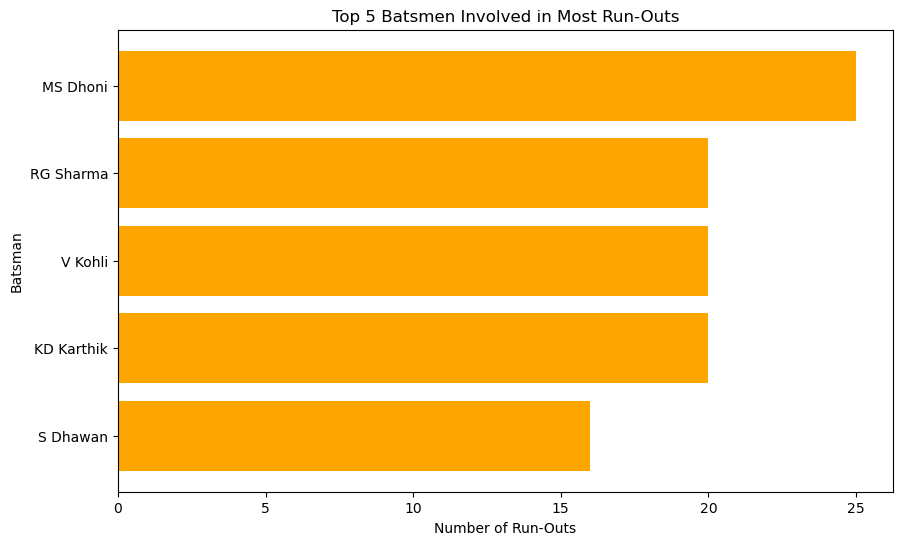

In [21]:
# Filter the dataset for run-outs (assuming 'dismissal_kind' is the column for dismissal types)
run_outs = df[df['dismissal_kind'] == 'run out']

# Count the number of run-outs for each batsman
run_out_batsmen = run_outs.groupby('batter')['dismissal_kind'].count().reset_index()

# Rename columns for clarity
run_out_batsmen.columns = ['batter', 'run_outs']

# Sort the batsmen by the number of run-outs in descending order
run_out_batsmen = run_out_batsmen.sort_values(by='run_outs', ascending=False)

# Get the top 5 batsmen involved in the most run-outs
top_5_run_outs = run_out_batsmen.head(5)

# Display the top 5 batsmen with the most run-outs
print(top_5_run_outs)

# Plot the top 5 batsmen involved in the most run-outs
plt.figure(figsize=(10, 6))
plt.barh(top_5_run_outs['batter'], top_5_run_outs['run_outs'], color='orange')
plt.xlabel('Number of Run-Outs')
plt.ylabel('Batsman')
plt.title('Top 5 Batsmen Involved in Most Run-Outs')
plt.gca().invert_yaxis()  # To display the batsman with the most run-outs at the top
plt.show()

6. Tabulate and visualize the top 5 bowlers who conceded the most extras.

         bowler  extra_runs
71      B Kumar         307
438  SL Malinga         292
119    DJ Bravo         258
355    R Ashwin         257
494    UT Yadav         257


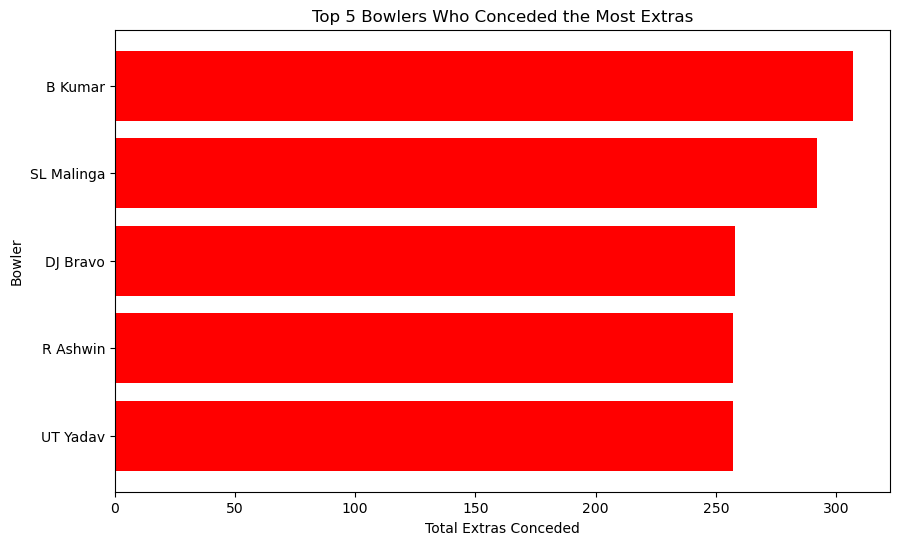

In [22]:

# Group by bowler and sum up the extra runs conceded
extras_conceded_by_bowler = df.groupby('bowler')['extra_runs'].sum().reset_index()

# Sort the bowlers by total extras conceded in descending order
extras_conceded_by_bowler = extras_conceded_by_bowler.sort_values(by='extra_runs', ascending=False)

# Get the top 5 bowlers who conceded the most extras
top_5_bowlers_extras = extras_conceded_by_bowler.head(5)

# Display the top 5 bowlers with the most extras
print(top_5_bowlers_extras)

# Plot the top 5 bowlers who conceded the most extras
plt.figure(figsize=(10, 6))
plt.barh(top_5_bowlers_extras['bowler'], top_5_bowlers_extras['extra_runs'], color='red')
plt.xlabel('Total Extras Conceded')
plt.ylabel('Bowler')
plt.title('Top 5 Bowlers Who Conceded the Most Extras')
plt.gca().invert_yaxis()  # To display the bowler with the most extras at the top
plt.show()

7.  Tabulate and visualize the most common dismissal type.

          dismissal_kind  count
0                 caught   8063
1                 bowled   2212
2                run out   1114
3                    lbw    800
4      caught and bowled    367
5                stumped    358
6           retired hurt     15
7             hit wicket     15
8  obstructing the field      3
9            retired out      3


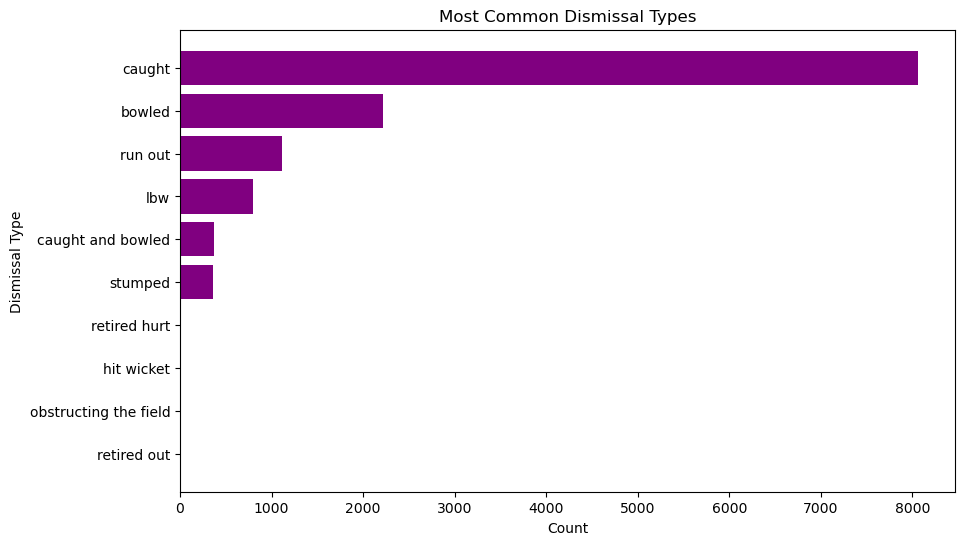

In [23]:
# Count the occurrences of each dismissal type
dismissal_counts = df['dismissal_kind'].value_counts().reset_index()

# Rename columns for clarity
dismissal_counts.columns = ['dismissal_kind', 'count']

# Sort the dismissal types by their count in descending order
dismissal_counts = dismissal_counts.sort_values(by='count', ascending=False)

# Display the most common dismissal types
print(dismissal_counts)

# Plot the most common dismissal types
plt.figure(figsize=(10, 6))
plt.barh(dismissal_counts['dismissal_kind'], dismissal_counts['count'], color='purple')
plt.xlabel('Count')
plt.ylabel('Dismissal Type')
plt.title('Most Common Dismissal Types')
plt.gca().invert_yaxis()  # To display the most common dismissal at the top
plt.show()

8. Find and display which of the top 3 overs has the highest run rate. 

In [24]:
# Group the data by over and sum the total runs for each over
over_run_rate = df.groupby('over')['total_runs'].sum().reset_index()

# Sort by total runs to get the top overs
top_overs = over_run_rate.sort_values(by='total_runs', ascending=False)

# Extract the top 3 overs with the highest total runs
top_3_overs = top_overs.head(3)

# Display the top 3 overs
print(top_3_overs)

# Find the over with the highest run rate (which will be the one with the most total runs)
highest_run_rate_over = top_3_overs.iloc[0]

# Display the over with the highest run rate
print(f"Over with the highest run rate: Over {highest_run_rate_over['over']} with {highest_run_rate_over['total_runs']} runs.")

    over  total_runs
17    17       19559
18    18       19076
16    16       19012
Over with the highest run rate: Over 17 with 19559 runs.


9. Analyze and visualize powerplay performance (first 6 overs).

Total Runs in Powerplay: 118056
Total Wickets in Powerplay: 3607
Run Rate in Powerplay: 19676.00


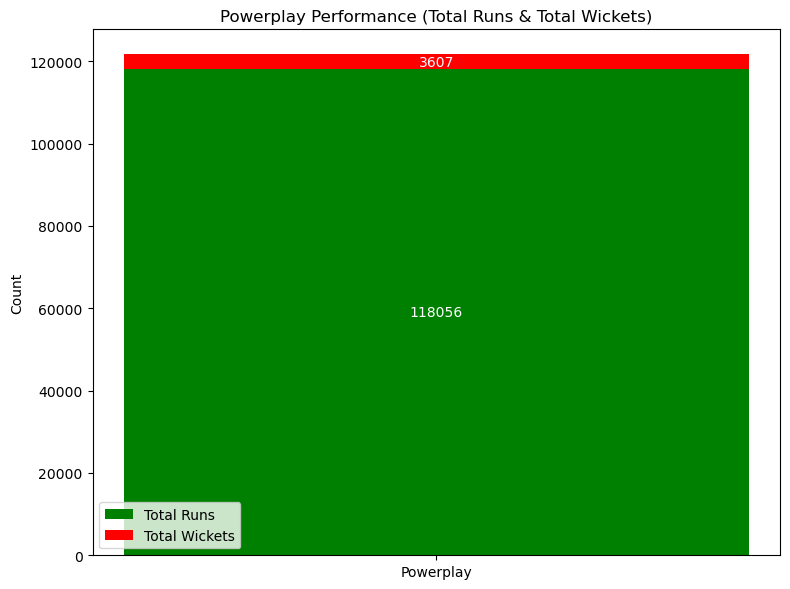

In [26]:

# Filter the data for the first 6 overs (Powerplay)
powerplay_data = df[df['over'] <= 6]

# Calculate the total runs scored in Powerplay
total_runs_powerplay = powerplay_data['total_runs'].sum()

# Calculate the total wickets in Powerplay (where dismissal_kind is not NaN)
total_wickets_powerplay = powerplay_data[powerplay_data['is_wicket'] == 1].shape[0]

# Calculate the run rate during Powerplay
run_rate_powerplay = total_runs_powerplay / 6  # Since we're considering the first 6 overs

# Display the calculated metrics
print(f"Total Runs in Powerplay: {total_runs_powerplay}")
print(f"Total Wickets in Powerplay: {total_wickets_powerplay}")
print(f"Run Rate in Powerplay: {run_rate_powerplay:.2f}")

# Visualize Powerplay performance with a combined bar chart
fig, ax = plt.subplots(figsize=(8, 6))

# Create the bar for total runs and total wickets in Powerplay
bars = ax.bar('Powerplay', total_runs_powerplay, color='green', label='Total Runs')
ax.bar('Powerplay', total_wickets_powerplay, bottom=total_runs_powerplay, color='red', label='Total Wickets')

# Add labels for runs and wickets
ax.text('Powerplay', total_runs_powerplay / 2, str(total_runs_powerplay), color='white', ha='center', va='center')
ax.text('Powerplay', total_runs_powerplay + total_wickets_powerplay / 2, str(total_wickets_powerplay), color='white', ha='center', va='center')

# Add titles and labels
ax.set_ylabel('Count')
ax.set_title('Powerplay Performance (Total Runs & Total Wickets)')
ax.legend()

plt.tight_layout()
plt.show()

10. Tabulate and visualize the top 5 batsmen with the most sixes and fours.

           Fours  Sixes  Total
batter                        
V Kohli      708    273    981
S Dhawan     768    153    921
DA Warner    663    236    899
RG Sharma    599    281    880
CH Gayle     408    359    767


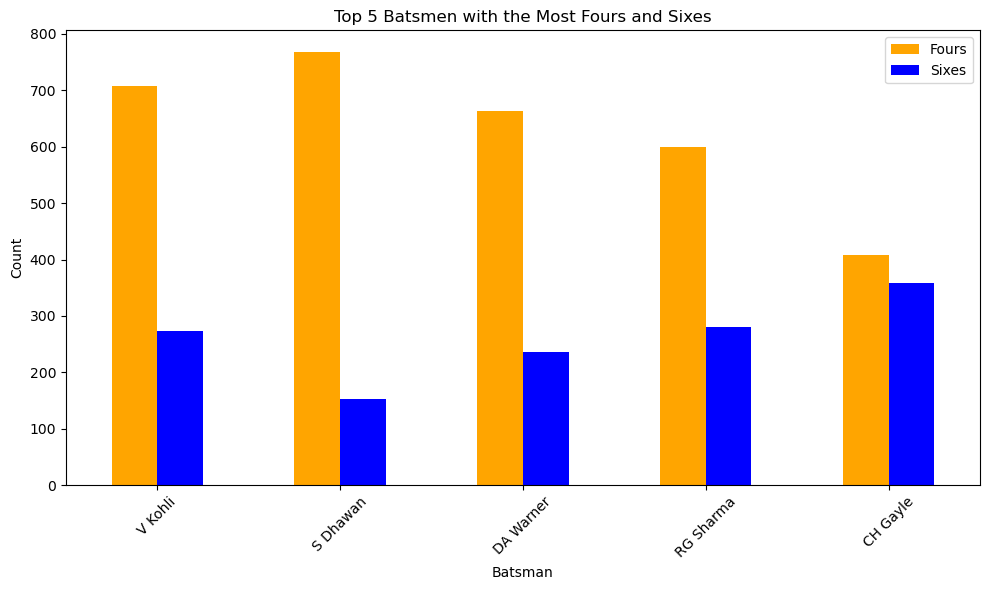

In [28]:

batsman_data = df[df['batsman_runs'].isin([4, 6])]

# Group by batsman and count the number of fours and sixes
batsman_fours_sixes = batsman_data.groupby('batter')['batsman_runs'].value_counts().unstack(fill_value=0)

# Rename the columns for clarity
batsman_fours_sixes.columns = ['Fours', 'Sixes']

# Calculate the total number of fours and sixes for each batsman
batsman_fours_sixes['Total'] = batsman_fours_sixes['Fours'] + batsman_fours_sixes['Sixes']

# Sort by total (fours + sixes) in descending order
top_batsmen = batsman_fours_sixes.sort_values(by='Total', ascending=False).head(5)

# Display the top 5 batsmen
print(top_batsmen)

# Plot the top 5 batsmen with the most sixes and fours
top_batsmen[['Fours', 'Sixes']].plot(kind='bar', figsize=(10, 6), color=['orange', 'blue'])

# Add labels and title
plt.xlabel('Batsman')
plt.ylabel('Count')
plt.title('Top 5 Batsmen with the Most Fours and Sixes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()